In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load grayscale image
gray_image = cv2.imread('/content/grayscale_img.jpg', cv2.IMREAD_GRAYSCALE)

# Load color image
color_image = cv2.imread('/content/test img.jpg')

In [ ]:
# Compute histogram
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


In [ ]:
# Compute histogram
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


In [ ]:
# Split color image into channels
b, g, r = cv2.split(color_image)

# Compute histograms for each channel
b_hist = cv2.calcHist([b], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g], [0], None, [256], [0, 256])
r_hist = cv2.calcHist([r], [0], None, [256], [0, 256])


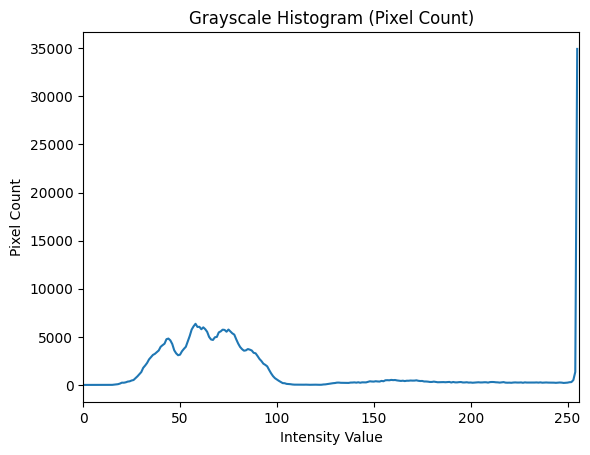

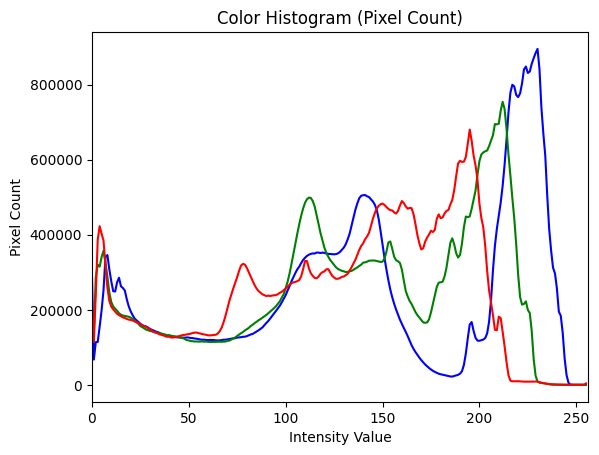

In [ ]:
# For grayscale image
plt.figure()
plt.title("Grayscale Histogram (Pixel Count)")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(gray_hist)
plt.xlim([0, 256])
plt.show()

# For color image
plt.figure()
plt.title("Color Histogram (Pixel Count)")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(b_hist, color='blue')
plt.plot(g_hist, color='green')
plt.plot(r_hist, color='red')
plt.xlim([0, 256])
plt.show()

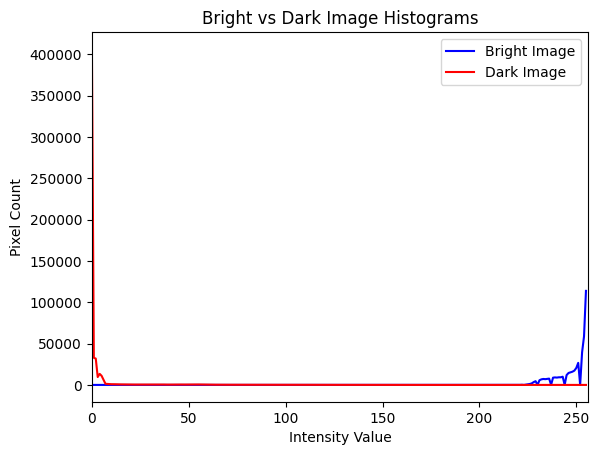

In [ ]:
# Load bright and dark images
bright_image = cv2.imread('/content/white_img.webp', cv2.IMREAD_GRAYSCALE)
dark_image = cv2.imread('/content/dark_img.jpg', cv2.IMREAD_GRAYSCALE)

# Compute histograms
bright_hist = cv2.calcHist([bright_image], [0], None, [256], [0, 256])
dark_hist = cv2.calcHist([dark_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure()
plt.title("Bright vs Dark Image Histograms")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(bright_hist, color='blue', label='Bright Image')
plt.plot(dark_hist, color='red', label='Dark Image')
plt.legend()
plt.xlim([0, 256])
plt.show()

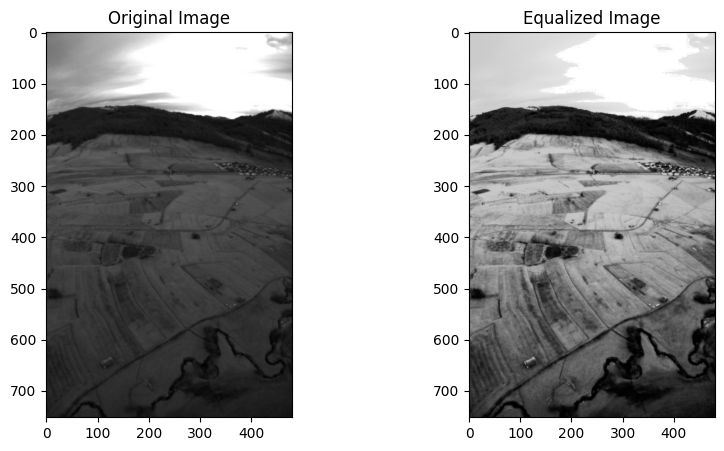

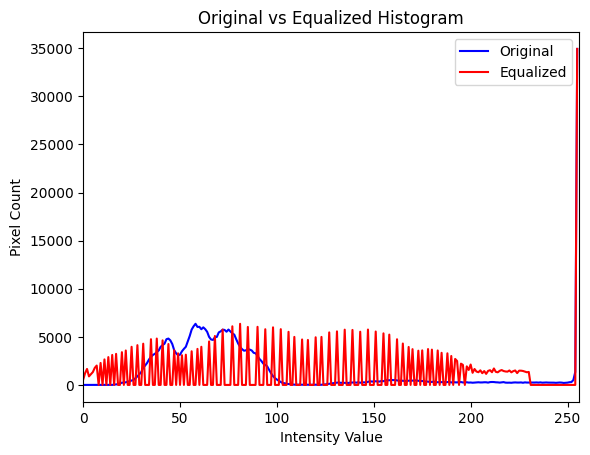

In [ ]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Compute histogram of equalized image
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.show()

# Display histograms
plt.figure()
plt.title("Original vs Equalized Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(gray_hist, color='blue', label='Original')
plt.plot(equalized_hist, color='red', label='Equalized')
plt.legend()
plt.xlim([0, 256])
plt.show()

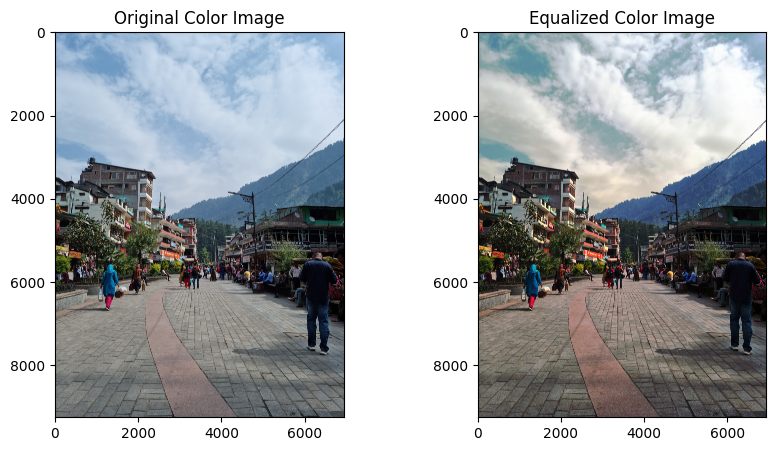

In [ ]:
# Split color image into channels
b, g, r = cv2.split(color_image)

# Equalize each channel
b_equalized = cv2.equalizeHist(b)
g_equalized = cv2.equalizeHist(g)
r_equalized = cv2.equalizeHist(r)

# Merge equalized channels
equalized_color_image = cv2.merge([b_equalized, g_equalized, r_equalized])

# Display original and equalized color images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Equalized Color Image")
plt.imshow(cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB))
plt.show()

Part 2

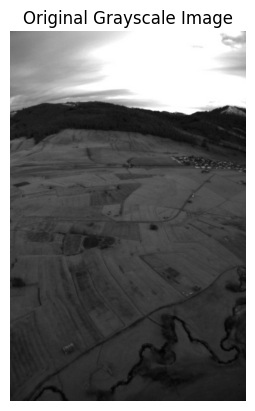

In [ ]:
# Load grayscale image
gray_image = cv2.imread('/content/grayscale_img.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure()
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Compute the 2D Fourier Transform using FFT
dft = np.fft.fft2(gray_image)

# Shift the zero-frequency component to the center of the spectrum
dft_shifted = np.fft.fftshift(dft)

# Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

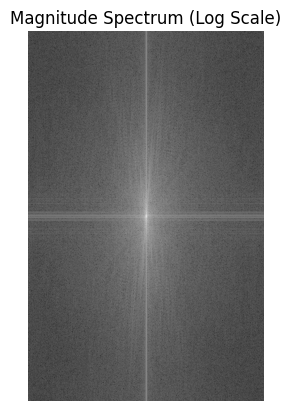

In [ ]:
plt.figure()
plt.title("Magnitude Spectrum (Log Scale)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Shift the zero-frequency component back to the top-left corner
idft_shifted = np.fft.ifftshift(dft_shifted)

# Compute the Inverse Fourier Transform
reconstructed_image = np.fft.ifft2(idft_shifted)

# Take the real part of the reconstructed image
reconstructed_image = np.abs(reconstructed_image)

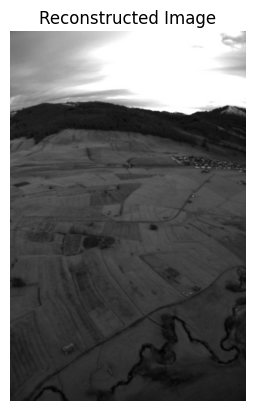

In [ ]:
plt.figure()
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.show()

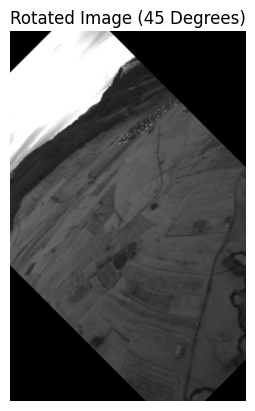

In [ ]:
# Get image dimensions
(h, w) = gray_image.shape

# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1.0)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

# Display the rotated image
plt.figure()
plt.title("Rotated Image (45 Degrees)")
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Compute the 2D Fourier Transform of the rotated image
dft_rotated = np.fft.fft2(rotated_image)

# Shift the zero-frequency component to the center
dft_rotated_shifted = np.fft.fftshift(dft_rotated)

# Compute the magnitude spectrum (log scale)
magnitude_spectrum_rotated = np.log(np.abs(dft_rotated_shifted) + 1)

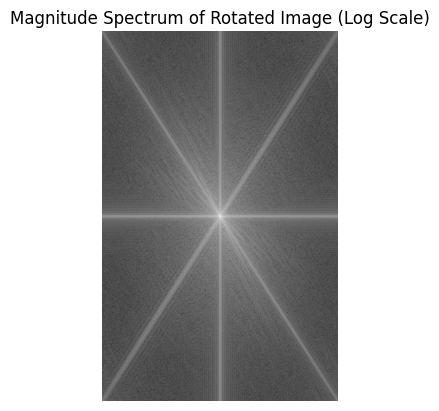

In [ ]:
plt.figure()
plt.title("Magnitude Spectrum of Rotated Image (Log Scale)")
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.axis('off')
plt.show()

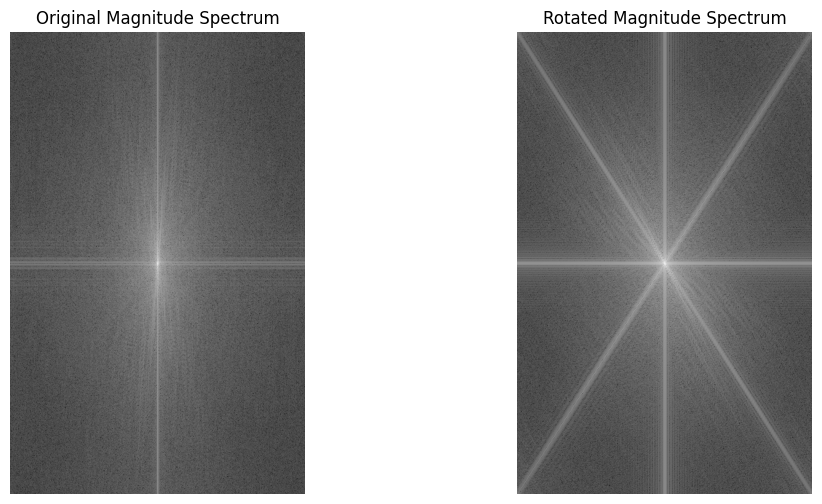

In [ ]:
plt.figure(figsize=(12, 6))

# Original magnitude spectrum
plt.subplot(1, 2, 1)
plt.title("Original Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Rotated magnitude spectrum
plt.subplot(1, 2, 2)
plt.title("Rotated Magnitude Spectrum")
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.axis('off')

plt.show()